# Homework Assigment 2

## Dataset Collecting

**Question 1**: Write a function that collects all titles and number of votes for each title of a given [hacker news page](http://news.ycombinator.com) (15pt)


In [250]:
from tmdbv3api import TMDb
from tmdbv3api import Movie
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.preprocessing import LabelEncoder

In [268]:
u = "https://news.ycombinator.com/"
html = requests.get(u).content.decode('utf-8')
soup = BeautifulSoup(html, 'html.parser')
l_titles = soup.findAll('td', attrs={'class': 'title'})
titles = [title.text.strip() for title in l_titles]
titles = titles[1::2]
l_points = soup.findAll('span', attrs={'class': 'score'})
title_points = [points.text.strip() for points in l_points]
df = pd.DataFrame([titles] + [title_points]).T
df.columns = ['titles', 'points']
df['points'] = df['points'].apply(lambda x: x.split(' ')[0] if not x==None else None)
df

,titles,points
0,Nvidia to Acquire Mellanox for $6.9B (nvidia.com),212
1,Curv: A language for making art using mathemat...,20
2,Kdenlive: an open-source video editor (kdenliv...,206
3,Open Distro for Elasticsearch (opendistro.gith...,21
4,Wipe and reinstall a running Linux system via ...,285
5,Roquette Science: How computerized arugula far...,40
6,New fastest portable hash: wyhash (github.com),85
7,You Don’t Need All That Complex/Expensive/Dist...,35
8,How the Internet Travels Across Oceans (nytime...,284
9,Norway’s Island with a Population of 1 (bbc.com),28


**Question 2**:  Write a function that collects data on four Harry Potter movies from [The Movie Database](https://www.themoviedb.org). You can use [tmdbv3api](https://pypi.org/project/tmdbv3api/) (15pt)

In [269]:
tmdb = TMDb()
tmdb.api_key = 'a7672300d7403695bbcd01699c27215a'
movie = Movie()
search = movie.search('Harry Potter')
harry_potter_data = {}
for res in search[:4]:
    movie.recommendations(res.id)
    recs = {}
    for recommendation in recommendations:
        recs[recommendation.title] = recommendation.overview
    harry_potter_data[res.title] = {'overview': res.overview, 'vote_average': res.vote_average, 'recommendations': recs}
hp_dataframe = pd.DataFrame(harry_potter_data).T
hp_dataframe

,overview,recommendations,vote_average
Harry Potter and the Philosopher's Stone,Harry Potter has lived under the stairs at his...,{'Mafiabrødre': 'Mafiabrødre handler om den ha...,7.8
Harry Potter and the Chamber of Secrets,"Ignoring threats to his life, Harry returns to...",{'Mafiabrødre': 'Mafiabrødre handler om den ha...,7.7
Harry Potter and the Order of the Phoenix,Returning for his fifth year of study at Hogwa...,{'Mafiabrødre': 'Mafiabrødre handler om den ha...,7.6
Harry Potter and the Goblet of Fire,"Harry starts his fourth year at Hogwarts, comp...",{'Mafiabrødre': 'Mafiabrødre handler om den ha...,7.7


## Kickstarter Projects Dataset

Using the [Kickstarter Projects Dataset](https://www.kaggle.com/kemical/kickstarter-projects#ks-projects-201801.csv) and Pandas, please answer one of following questions:

### <span style="color:red"> Please answer only **one** of the following questions according to your (ID number + 1) (use the formula **<YOUR_ID> mod 3 +1**) </span>

In [270]:
# which question to answer - put your ID number and run the code 
your_id  = "302957139"
q = (int(your_id) + 1) % 3 + 1
print("You need to answer questions %s and 4" % q)

You need to answer questions 2 and 4


**Question 1:** On average which project category received the highest number of backers? (15 pt) 

**Question 2:** On average which project category received the highest pledged USD? (15 pt)

In [271]:
kickstarter_df = pd.read_csv('datasets/ks-projects-201801.csv')
mean_usd = kickstarter_df.groupby('category').mean()['usd pledged']
mean_usd.idxmax()

'3D Printing'

**Question 3:** In which month is there the highest number of projects? (15 pt)

**Question 4 (for all):** Visualize your answer using matplotlib or seaborn (15pt)

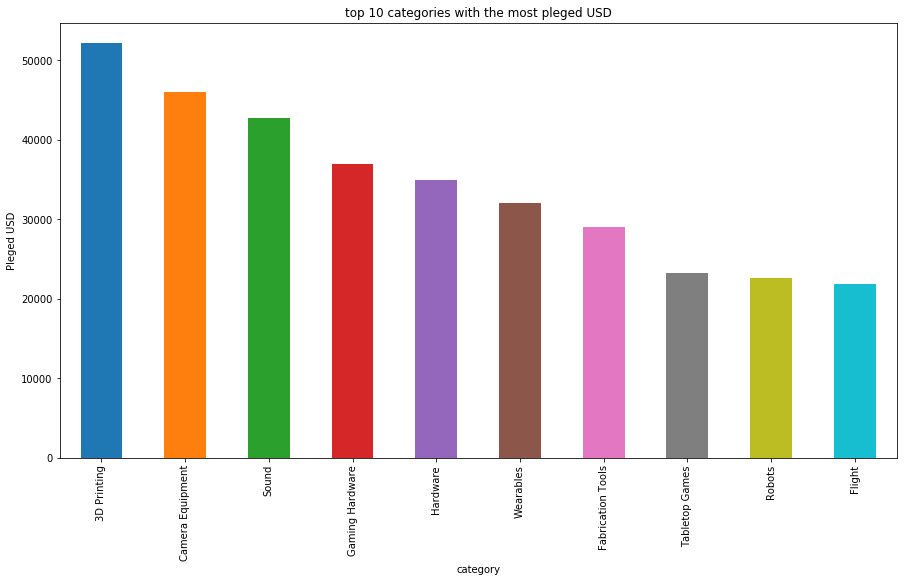

In [283]:
mean_usd.sort_values(ascending =False).head(10).plot.bar(figsize =(15,8))
title = plt.title('top 10 categories with the most pleged USD')
y = plt.ylabel('Pleged USD')

## The Marvel Universe Social Network

Using the [The Marvel Universe Social Network](https://www.kaggle.com/csanhueza/the-marvel-universe-social-network) and  Pandas, please answer one of following questions:

**Question 1:** Write code which calculate the top-10 most friendly characters, i.e., characters with the 
    highest number of friends. Please use _hero_network.csv_ file (15pt). 
    
**Note:** Not all the links in this dataset are symmetric.

**Question 2:** Using Pandas and Networkx create a graph object of The Marvel Universe Social Network with the 150 most "friendly" characters (10pt).
    The vertices in that graph need to be relative to the size of each character's number of links (also referred to as the vertex degree) (10pt).
Please color each node in the graph according to character type (5pt)

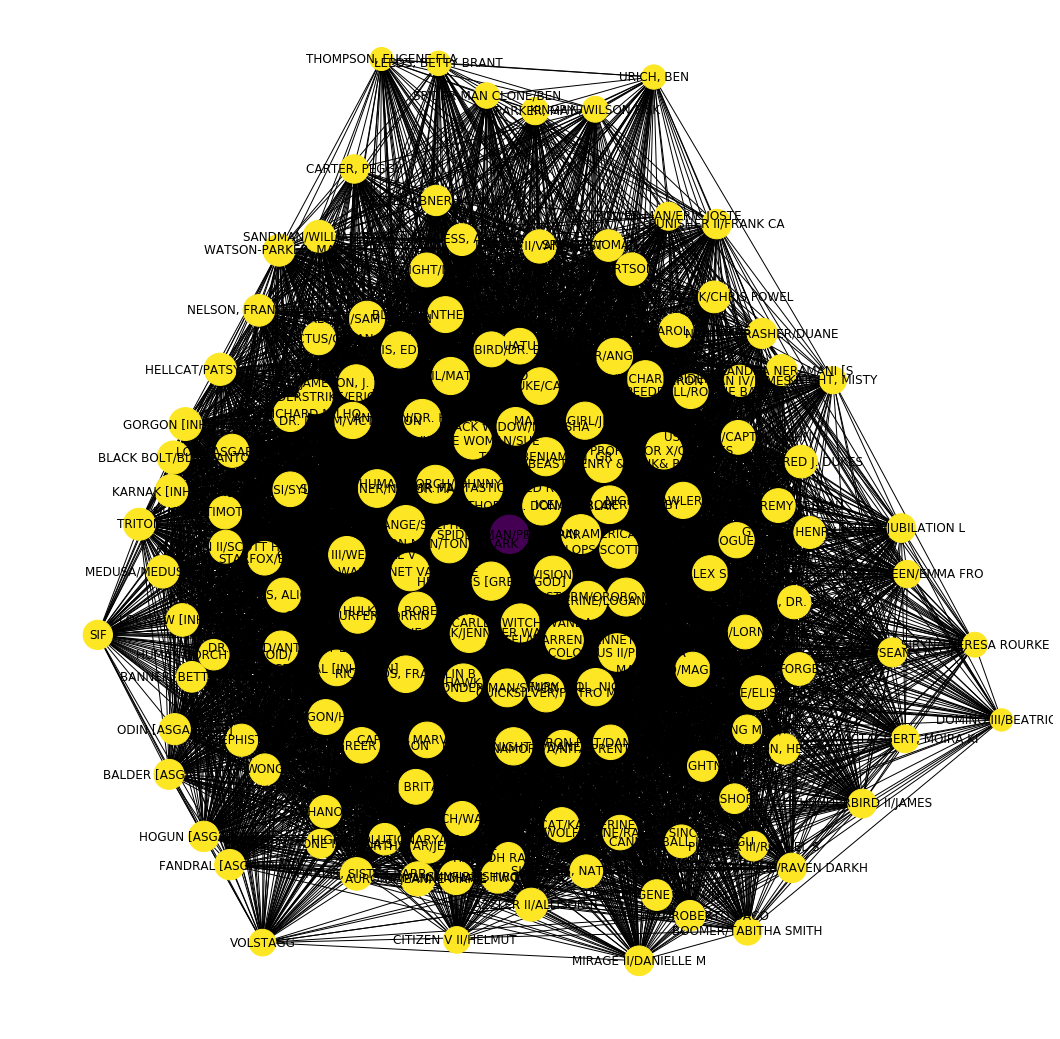

In [284]:
heros_net = pd.read_csv('datasets/marvel/hero-network.csv')
heros_type = pd.read_csv('datasets/marvel/nodes.csv')
links = heros_net.values.tolist()
# I assumed each connection is both ways
hero_graph = nx.Graph(links)
nodes_degree = sorted(hero_graph.degree, key=lambda x: x[1], reverse=True)
remove_nodes = [i[0] for i in a][150:]
hero_graph.remove_nodes_from(remove_nodes)
d = dict(nx.degree(hero_graph))
heros_type['type'] = LabelEncoder().fit_transform(heros_type['type'])
color_dict = heros_type.set_index('node').T.to_dict('records')[0]
keys = [*d]
colors = np.zeros(len(keys)).tolist()
for i in range(len(keys)):
    if keys[i][-1] == ' ':
        keys[i] = keys[i][:-1]
    if keys[i] in color_dict:
        colors[i] = color_dict[keys[i]]
plt.figure(3,figsize=(14,14))
nx.draw_kamada_kawai(hero_graph, with_labels=True, node_size=[v * 10 for v in d.values()], node_color=colors)

**Bonus:** Visualize the above network using [Cytoscape](https://cytoscape.org) or [Gephi](https://gephi.org) (10pt)